In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('ecommerce-data.csv')

In [3]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])

In [4]:
date_dimension = pd.DataFrame(data['Date'].unique(), columns=['Date']).sort_values(by='Date').reset_index(drop=True)

date_dimension['DateID'] = date_dimension.index + 1

date_dimension['Year'] = date_dimension['Date'].dt.year
date_dimension['Month'] = date_dimension['Date'].dt.month
date_dimension['Day'] = date_dimension['Date'].dt.day
date_dimension['Quarter'] = date_dimension['Date'].dt.quarter
date_dimension = date_dimension[['DateID', 'Date', 'Year', 'Quarter', 'Month', 'Day']]
date_dimension.head()


,DateID,Date,Year,Quarter,Month,Day
0,1,2021-09-28,2021,3,9,28
1,2,2021-09-29,2021,3,9,29
2,3,2021-09-30,2021,3,9,30
3,4,2021-10-01,2021,4,10,1
4,5,2021-10-02,2021,4,10,2


In [5]:
# ProductDimensionTable
product_dimension = data[['ProductName', 'ProductCategory', 'ProductSubCategory', 'ProductPrice']].drop_duplicates().reset_index(drop=True)
product_dimension['ProductID'] = range(1, len(product_dimension) + 1)
product_dimension = product_dimension[['ProductID', 'ProductName', 'ProductCategory', 'ProductSubCategory', 'ProductPrice']]

customer_dimension = data[['CustomerName', 'CustomerEmail', 'CustomerAddress', 'CustomerPhone', 'CustomerSegment']].drop_duplicates().reset_index(drop=True)
customer_dimension['CustomerID'] = range(1, len(customer_dimension) + 1)
customer_dimension = customer_dimension[['CustomerID', 'CustomerName', 'CustomerEmail', 'CustomerAddress', 'CustomerPhone', 'CustomerSegment']]

# SupplierDimensionTable
supplier_dimension = data[['SupplierName', 'SupplierLocation', 'SupplierContact']].drop_duplicates().reset_index(drop=True)
supplier_dimension['SupplierID'] = range(1, len(supplier_dimension) + 1)
supplier_dimension = supplier_dimension[['SupplierID', 'SupplierName', 'SupplierLocation', 'SupplierContact']]

# TransporterDimensionTable
transporter_dimension = data[['ShipperName', 'ShippingMethod']].drop_duplicates().reset_index(drop=True)
transporter_dimension['TransporterID'] = range(1, len(transporter_dimension) + 1)
transporter_dimension = transporter_dimension[['TransporterID', 'ShipperName', 'ShippingMethod']]

In [6]:
print("Date Dimension Table:\n", date_dimension.head())
print("\nProduct Dimension Table:\n", product_dimension.head())
print("\nCustomer Dimension Table:\n", customer_dimension.head())
print("\nSupplier Dimension Table:\n", supplier_dimension.head())
print("\nTransporter Dimension Table:\n", transporter_dimension.head())

Date Dimension Table:
    DateID       Date  Year  Quarter  Month  Day
0       1 2021-09-28  2021        3      9   28
1       2 2021-09-29  2021        3      9   29
2       3 2021-09-30  2021        3      9   30
3       4 2021-10-01  2021        4     10    1
4       5 2021-10-02  2021        4     10    2

Product Dimension Table:
    ProductID         ProductName  ProductCategory ProductSubCategory  \
0          1           Nathaniel      Electronics             Camera   
1          2  NonExistentProduct      Electronics             Mobile   
2          3              Angela  InvalidCategory     Action Figures   
3          4           Nathaniel      Electronics             Camera   
4          5              Justin      Electronics         Headphones   

  ProductPrice  
0         0.01  
1       847.43  
2       386.57  
3       652.35  
4      66005.0  

Customer Dimension Table:
    CustomerID     CustomerName                CustomerEmail  \
0           1    Colleen Kelly      

In [13]:

date_dimension.to_csv('date_dimension.csv', index=False)
product_dimension.to_csv('product_dimension.csv', index=False)
customer_dimension.to_csv('customer_dimension.csv', index=False)
supplier_dimension.to_csv('supplier_dimension.csv', index=False)
transporter_dimension.to_csv('transporter_dimension.csv', index=False)

In [16]:

date_dimension = pd.DataFrame(data['Date'].unique(), columns=['Date']).sort_values(by='Date').reset_index(drop=True)
date_dimension['DateID'] = range(1, len(date_dimension) + 1)

product_dimension = data[['ProductName', 'ProductCategory', 'ProductSubCategory', 'ProductPrice']].drop_duplicates().reset_index(drop=True)
product_dimension['ProductID'] = range(1, len(product_dimension) + 1)

customer_dimension = data[['CustomerName', 'CustomerEmail', 'CustomerAddress', 'CustomerPhone', 'CustomerSegment']].drop_duplicates().reset_index(drop=True)
customer_dimension['CustomerID'] = range(1, len(customer_dimension) + 1)

supplier_dimension = data[['SupplierName', 'SupplierLocation', 'SupplierContact']].drop_duplicates().reset_index(drop=True)
supplier_dimension['SupplierID'] = range(1, len(supplier_dimension) + 1)

transporter_dimension = data[['ShipperName', 'ShippingMethod']].drop_duplicates().reset_index(drop=True)
transporter_dimension['TransporterID'] = range(1, len(transporter_dimension) + 1)


sales_fact = data[['Date', 'ProductName', 'CustomerName', 'SupplierName', 'ShipperName', 
                   'QuantitySold', 'TotalAmount', 'DiscountAmount', 'NetAmount']].copy()

sales_fact = sales_fact.merge(date_dimension[['Date', 'DateID']], on='Date', how='left')
sales_fact = sales_fact.merge(product_dimension[['ProductName', 'ProductID']], on='ProductName', how='left')
sales_fact = sales_fact.merge(customer_dimension[['CustomerName', 'CustomerID']], on='CustomerName', how='left')
sales_fact = sales_fact.merge(supplier_dimension[['SupplierName', 'SupplierID']], on='SupplierName', how='left')
sales_fact = sales_fact.merge(transporter_dimension[['ShipperName', 'TransporterID']], on='ShipperName', how='left')

sales_fact = sales_fact[['DateID', 'ProductID', 'CustomerID', 'SupplierID', 'TransporterID', 
                         'QuantitySold', 'TotalAmount', 'DiscountAmount', 'NetAmount']]

inventory_fact = data[['Date', 'ProductName', 'SupplierName', 'StockReceived', 'StockSold', 'StockOnHand']].copy()

inventory_fact = inventory_fact.merge(date_dimension[['Date', 'DateID']], on='Date', how='left')
inventory_fact = inventory_fact.merge(product_dimension[['ProductName', 'ProductID']], on='ProductName', how='left')
inventory_fact = inventory_fact.merge(supplier_dimension[['SupplierName', 'SupplierID']], on='SupplierName', how='left')

inventory_fact = inventory_fact[['DateID', 'ProductID', 'SupplierID', 'StockReceived', 'StockSold', 'StockOnHand']]

print("Sales Fact Table:\n", sales_fact.head())
print("\nInventory Fact Table:\n", inventory_fact.head())

sales_fact.to_csv('sales_fact.csv', index=False)
inventory_fact.to_csv('inventory_fact.csv', index=False)

Sales Fact Table:
    DateID  ProductID  CustomerID  SupplierID  TransporterID  QuantitySold  \
0     715          1           1           1              1            49   
1     715          1           1           1              8            49   
2     715          1           1           1             15            49   
3     715          1           1          38              1            49   
4     715          1           1          38              8            49   

   TotalAmount  DiscountAmount  NetAmount  
0     31965.15          121.07   31844.08  
1     31965.15          121.07   31844.08  
2     31965.15          121.07   31844.08  
3     31965.15          121.07   31844.08  
4     31965.15          121.07   31844.08  

Inventory Fact Table:
    DateID  ProductID  SupplierID  StockReceived  StockSold  StockOnHand
0     715          1           1            475        127          348
1     715          1          38            475        127          348
2     715     

In [17]:
shipping_address_dimension = data[['CustomerAddress']].drop_duplicates().reset_index(drop=True)
shipping_address_dimension['AddressID'] = range(1, len(shipping_address_dimension) + 1)

customer_dimension = data[['CustomerName', 'CustomerEmail', 'CustomerPhone', 'CustomerSegment']].drop_duplicates().reset_index(drop=True)
customer_dimension['CustomerID'] = range(1, len(customer_dimension) + 1)

customer_dimension = customer_dimension.merge(data[['CustomerName', 'CustomerAddress']], on='CustomerName', how='left')
customer_dimension = customer_dimension.merge(shipping_address_dimension[['CustomerAddress', 'AddressID']], on='CustomerAddress', how='left')
customer_dimension = customer_dimension.drop(columns=['CustomerAddress'])


delivery_fact = data[['Date', 'ShipperName', 'CustomerName', 'QuantitySold', 'TotalAmount', 'ShippingMethod']].copy()

date_dimension = pd.DataFrame(data['Date'].unique(), columns=['Date']).sort_values(by='Date').reset_index(drop=True)
date_dimension['DateID'] = range(1, len(date_dimension) + 1)

delivery_fact = delivery_fact.merge(date_dimension[['Date', 'DateID']], on='Date', how='left')
delivery_fact = delivery_fact.merge(customer_dimension[['CustomerName', 'CustomerID', 'AddressID']], on='CustomerName', how='left')
delivery_fact = delivery_fact.merge(shipping_address_dimension[['AddressID', 'CustomerAddress']], on='AddressID', how='left')
delivery_fact = delivery_fact.merge(data[['ShipperName', 'ShippingMethod']].drop_duplicates(), on=['ShipperName', 'ShippingMethod'], how='left')

transporter_dimension = data[['ShipperName', 'ShippingMethod']].drop_duplicates().reset_index(drop=True)
transporter_dimension['TransporterID'] = range(1, len(transporter_dimension) + 1)

delivery_fact = delivery_fact.merge(transporter_dimension[['ShipperName', 'TransporterID']], on='ShipperName', how='left')

delivery_fact = delivery_fact[['DateID', 'CustomerID', 'AddressID', 'TransporterID', 'QuantitySold', 'TotalAmount', 'ShippingMethod']]
print("Shipping Address Dimension Table (shipping_address_dimension):\n", shipping_address_dimension.head())
print("\nDelivery Fact Table (delivery_fact):\n", delivery_fact.head())

shipping_address_dimension.to_csv('shipping_address_dimension.csv', index=False)
delivery_fact.to_csv('delivery_fact.csv', index=False)

Shipping Address Dimension Table (shipping_address_dimension):
                                  CustomerAddress  AddressID
0  354 Mcdowell Turnpike, Port Charles, CT 95318          1
1       24740 Fox Villages, New Tracie, MA 53038          2
2            769 Joe Trail, East Terri, CA 43813          3
3    25357 Blackwell Locks, Andreabury, MH 27857          4
4               PSC 1552, Box 7906, APO AP 50694          5

Delivery Fact Table (delivery_fact):
    DateID  CustomerID  AddressID  TransporterID  QuantitySold  TotalAmount  \
0     715           1          1              1            49     31965.15   
1     715           1          1              8            49     31965.15   
2     715           1          1             15            49     31965.15   
3     501           2          2              2            73     61862.39   
4     501           2          2              3            73     61862.39   

  ShippingMethod  
0         Ground  
1         Ground  
2         G

In [18]:
transportation_type_dimension = data[['ShippingMethod']].drop_duplicates().reset_index(drop=True)
transportation_type_dimension['TransportationTypeID'] = range(1, len(transportation_type_dimension) + 1)

transporter_dimension = data[['ShipperName', 'ShippingMethod']].drop_duplicates().reset_index(drop=True)
transporter_dimension = transporter_dimension.merge(transportation_type_dimension, on='ShippingMethod', how='left')
transporter_dimension['TransporterID'] = range(1, len(transporter_dimension) + 1)

date_dimension = pd.DataFrame(data['Date'].unique(), columns=['Date']).sort_values(by='Date').reset_index(drop=True)
date_dimension['DateID'] = range(1, len(date_dimension) + 1)

delivery_fact = data[['Date', 'ShipperName', 'CustomerName', 'QuantitySold', 'TotalAmount', 'ShippingMethod']].copy()

delivery_fact = delivery_fact.merge(date_dimension[['Date', 'DateID']], on='Date', how='left')
delivery_fact = delivery_fact.merge(transporter_dimension[['ShipperName', 'TransporterID', 'TransportationTypeID']], on='ShipperName', how='left')

customer_dimension = data[['CustomerName', 'CustomerEmail', 'CustomerPhone', 'CustomerSegment']].drop_duplicates().reset_index(drop=True)
customer_dimension['CustomerID'] = range(1, len(customer_dimension) + 1)

shipping_address_dimension = data[['CustomerAddress']].drop_duplicates().reset_index(drop=True)
shipping_address_dimension['AddressID'] = range(1, len(shipping_address_dimension) + 1)

customer_dimension = customer_dimension.merge(data[['CustomerName', 'CustomerAddress']], on='CustomerName', how='left')
customer_dimension = customer_dimension.merge(shipping_address_dimension[['CustomerAddress', 'AddressID']], on='CustomerAddress', how='left')
delivery_fact = delivery_fact.merge(customer_dimension[['CustomerName', 'CustomerID', 'AddressID']], on='CustomerName', how='left')

delivery_fact = delivery_fact[['DateID', 'CustomerID', 'AddressID', 'TransporterID', 'TransportationTypeID', 'QuantitySold', 'TotalAmount']]

print("Transportation Type Dimension Table (transportation_type_dimension):\n", transportation_type_dimension.head())
print("\nUpdated Transporter Dimension Table (transporter_dimension):\n", transporter_dimension.head())
print("\nDelivery Fact Table with Transportation Type (delivery_fact):\n", delivery_fact.head())

transportation_type_dimension.to_csv('transportation_type_dimension.csv', index=False)
transporter_dimension.to_csv('transporter_dimension.csv', index=False)
delivery_fact.to_csv('delivery_fact.csv', index=False)

Transportation Type Dimension Table (transportation_type_dimension):
   ShippingMethod  TransportationTypeID
0         Ground                     1
1            Air                     2
2            Sea                     3

Updated Transporter Dimension Table (transporter_dimension):
   ShipperName ShippingMethod  TransportationTypeID  TransporterID
0    and Sons         Ground                     1              1
1         PLC            Air                     2              2
2         PLC            Sea                     3              3
3         Ltd            Sea                     3              4
4         Inc         Ground                     1              5

Delivery Fact Table with Transportation Type (delivery_fact):
    DateID  CustomerID  AddressID  TransporterID  TransportationTypeID  \
0     715           1          1              1                     1   
1     715           1          1              8                     3   
2     715           1          1

In [19]:
transporter_dimension = data[['ShipperName', 'ShippingMethod']].drop_duplicates().reset_index(drop=True)

transporter_dimension['TransporterID'] = range(1, len(transporter_dimension) + 1)

transporter_dimension.to_csv('transporter_dimension.csv', index=False)

In [21]:
import pandas as pd
import hashlib

def display_before_after(column_name, dataframe, function):
    print(f"Before Anonymization ({column_name}):")
    print(dataframe[[column_name]].head())
    dataframe[column_name] = dataframe[column_name].apply(function)
    print(f"\nAfter Anonymization ({column_name}):")
    print(dataframe[[column_name]].head())
    print("\n" + "-"*40 + "\n")

display_before_after('CustomerEmail', customer_dimension, lambda x: hashlib.sha256(x.encode()).hexdigest() if pd.notnull(x) else x)
display_before_after('CustomerPhone', customer_dimension, lambda x: hashlib.sha256(x.encode()).hexdigest() if pd.notnull(x) else x)

display_before_after('CustomerAddress', shipping_address_dimension, lambda x: x.split(',')[-1] if pd.notnull(x) else x)

display_before_after('SupplierContact', supplier_dimension, lambda x: hashlib.sha256(x.encode()).hexdigest() if pd.notnull(x) else x)


Before Anonymization (CustomerEmail):
                 CustomerEmail
0        maryhurst@example.org
1  sandersvictoria@example.org
2          ospence@example.net
3          epowell@example.net
4                          NaN

After Anonymization (CustomerEmail):
                                       CustomerEmail
0  6ed8a1ccacd96bca3549e14e03290d04737213a9924bf5...
1  c6723efcb30404e3bb27824a3c23b358e78ee20a88c5ec...
2  e735f24e798a81544925724b92096b438fb62d61a1d876...
3  e61c63195f38cc1b66531ec0915e028da31c094bdafc3f...
4                                                NaN

----------------------------------------

Before Anonymization (CustomerPhone):
            CustomerPhone
0       908.610.2711x8507
1     +1-408-938-0389x952
2  001-929-516-1919x39288
3              9999921886
4  001-691-442-5371x97648

After Anonymization (CustomerPhone):
                                       CustomerPhone
0  662953ff2bc6e3bdadba75fc6d1bc878e051f3563310fd...
1  099d96527cb6a634ee28197923af04176b74

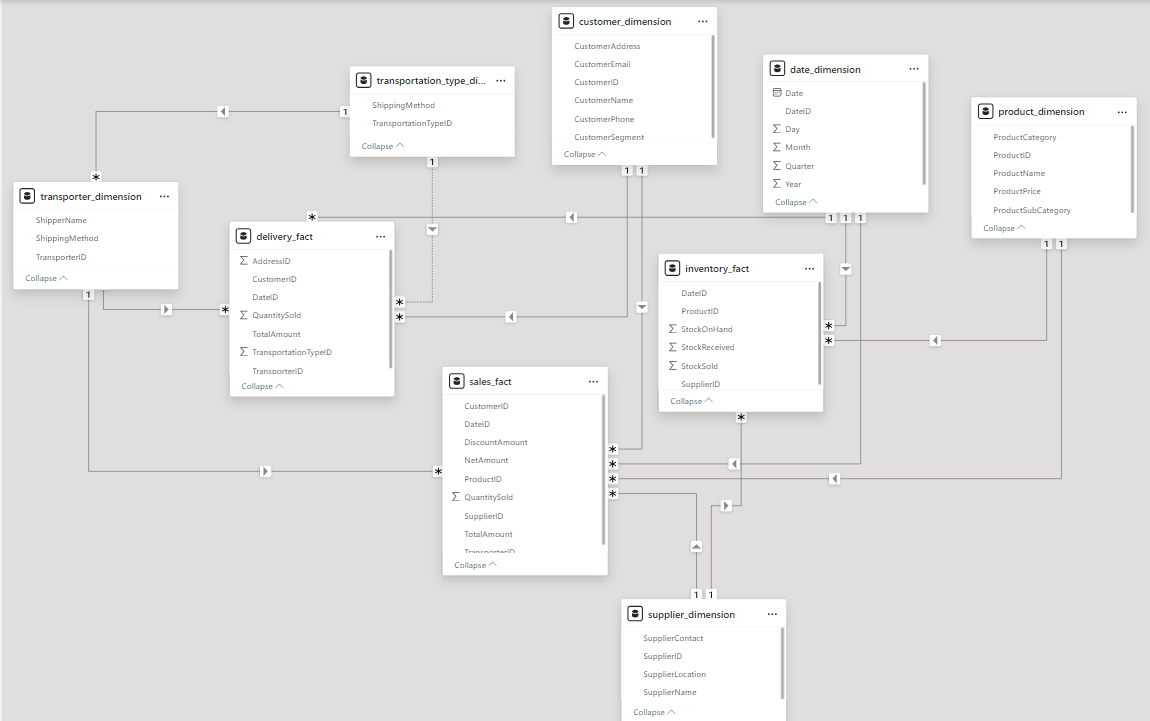

Connection to MySQL

In [27]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Parisonata1998!" 
)

cursor = conn.cursor()

cursor.execute("CREATE DATABASE IF NOT EXISTS OpenDataWarehouse")
print("Database 'OpenDataWarehouse' created successfully")

cursor.close()
conn.close()


Database 'OpenDataWarehouse' created successfully


In [29]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Parisonata1998!",
    database="OpenDataWarehouse"
)

cursor = conn.cursor()


table_definitions = {
    "customer_dimension": """
        CREATE TABLE IF NOT EXISTS customer_dimension (
            CustomerID INT PRIMARY KEY,
            CustomerName VARCHAR(255),
            CustomerEmail VARCHAR(255),
            CustomerAddress VARCHAR(255),
            CustomerPhone VARCHAR(20),
            CustomerSegment VARCHAR(50)
        )
    """,
    "product_dimension": """
        CREATE TABLE IF NOT EXISTS product_dimension (
            ProductID INT PRIMARY KEY,
            ProductName VARCHAR(255),
            ProductCategory VARCHAR(255),
            ProductSubCategory VARCHAR(255),
            ProductPrice DECIMAL(10, 2)
        )
    """,
    "supplier_dimension": """
        CREATE TABLE IF NOT EXISTS supplier_dimension (
            SupplierID INT PRIMARY KEY,
            SupplierName VARCHAR(255),
            SupplierLocation VARCHAR(255),
            SupplierContact VARCHAR(20)
        )
    """,
    "transporter_dimension": """
        CREATE TABLE IF NOT EXISTS transporter_dimension (
            TransporterID INT PRIMARY KEY,
            ShipperName VARCHAR(255),
            ShippingMethod VARCHAR(50)
        )
    """,
    "transportation_type_dimension": """
        CREATE TABLE IF NOT EXISTS transportation_type_dimension (
            TransportationTypeID INT PRIMARY KEY,
            ShippingMethod VARCHAR(50)
        )
    """,
    "shipping_address_dimension": """
        CREATE TABLE IF NOT EXISTS shipping_address_dimension (
            AddressID INT PRIMARY KEY,
            CustomerAddress VARCHAR(255)
        )
    """,
    "date_dimension": """
        CREATE TABLE IF NOT EXISTS date_dimension (
            DateID INT PRIMARY KEY,
            Date DATE,
            Day INT,
            Month INT,
            Quarter INT,
            Year INT
        )
    """,
    "sales_fact": """
        CREATE TABLE IF NOT EXISTS sales_fact (
            CustomerID INT,
            DateID INT,
            DiscountAmount DECIMAL(10, 2),
            NetAmount DECIMAL(10, 2),
            ProductID INT,
            QuantitySold INT,
            SoldOnline BOOLEAN,
            FOREIGN KEY (CustomerID) REFERENCES customer_dimension(CustomerID),
            FOREIGN KEY (DateID) REFERENCES date_dimension(DateID),
            FOREIGN KEY (ProductID) REFERENCES product_dimension(ProductID)
        )
    """,
    "inventory_fact": """
        CREATE TABLE IF NOT EXISTS inventory_fact (
            DateID INT,
            ProductID INT,
            SupplierID INT,
            StockReceived INT,
            StockSold INT,
            StockOnHand INT,
            FOREIGN KEY (DateID) REFERENCES date_dimension(DateID),
            FOREIGN KEY (ProductID) REFERENCES product_dimension(ProductID),
            FOREIGN KEY (SupplierID) REFERENCES supplier_dimension(SupplierID)
        )
    """,
    "delivery_fact": """
        CREATE TABLE IF NOT EXISTS delivery_fact (
            AddressID INT,
            CustomerID INT,
            DateID INT,
            TransporterID INT,
            TransportationTypeID INT,
            QuantitySold INT,
            TotalAmount DECIMAL(10, 2),
            FOREIGN KEY (AddressID) REFERENCES shipping_address_dimension(AddressID),
            FOREIGN KEY (CustomerID) REFERENCES customer_dimension(CustomerID),
            FOREIGN KEY (DateID) REFERENCES date_dimension(DateID),
            FOREIGN KEY (TransporterID) REFERENCES transporter_dimension(TransporterID),
            FOREIGN KEY (TransportationTypeID) REFERENCES transportation_type_dimension(TransportationTypeID)
        )
    """
}

for table_name, table_query in table_definitions.items():
    cursor.execute(table_query)
    print(f"Table '{table_name}' created successfully")

conn.commit()

Table 'customer_dimension' created successfully
Table 'product_dimension' created successfully
Table 'supplier_dimension' created successfully
Table 'transporter_dimension' created successfully
Table 'transportation_type_dimension' created successfully
Table 'shipping_address_dimension' created successfully
Table 'date_dimension' created successfully
Table 'sales_fact' created successfully
Table 'inventory_fact' created successfully
Table 'delivery_fact' created successfully


In [31]:
import mysql.connector
import pandas as pd

def insert_data_from_csv(table_name, csv_file, conn):
    try:
        data = pd.read_csv(csv_file)
        
        data = data.where(pd.notnull(data), None)
        
        columns = ", ".join(data.columns)
        placeholders = ", ".join(["%s"] * len(data.columns))
        
        insert_query = f"INSERT IGNORE INTO {table_name} ({columns}) VALUES ({placeholders})"
        
        data_tuples = [tuple(row) for row in data.values]
        
        cursor = conn.cursor()
        cursor.executemany(insert_query, data_tuples)
        conn.commit()
        
        print(f"Successfully loaded data into '{table_name}'.")

    except Exception as e:
        print(f"Failed to load data into '{table_name}'. Error: {e}")

insert_data_from_csv("customer_dimension", "customer_dimension.csv", conn)
insert_data_from_csv("product_dimension", "product_dimension.csv", conn)
insert_data_from_csv("supplier_dimension", "supplier_dimension.csv", conn)
insert_data_from_csv("transporter_dimension", "transporter_dimension.csv", conn)
insert_data_from_csv("transportation_type_dimension", "transportation_type_dimension.csv", conn)
insert_data_from_csv("shipping_address_dimension", "shipping_address_dimension.csv", conn)
# insert_data_from_csv("sales_fact", "sales_fact.csv", conn)
# insert_data_from_csv("inventory_fact", "inventory_fact.csv", conn)
# insert_data_from_csv("delivery_fact", "delivery_fact.csv", conn)


Successfully loaded data into 'customer_dimension'.
Successfully loaded data into 'product_dimension'.
Successfully loaded data into 'supplier_dimension'.
Successfully loaded data into 'transporter_dimension'.
Successfully loaded data into 'transportation_type_dimension'.
Successfully loaded data into 'shipping_address_dimension'.
